# Name : Raj Jaiswal
# Applied for : Data Science Internship
# Task : Healthcare image classification

## **VGG Multiclass Image Classification using Transfer learning**

In this notebook I have shown how a transfer learning / pre trained CNN Model  is implemented on a multiclass image classification problem. I have covered

How to create a VGG CNN Model and Train it.

How to evaluate the model on test set using different classification metrics.

How to visualize the images present in the training and test set.

**1. Import the Required Libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow import keras

In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.2 MB/s 
     |████████████████████████████████| 112 kB 62.9 MB/s 
     |████████████████████████████████| 2.3 MB 48.4 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 270 kB 44.8 MB/s 
     |████████████████████████████████| 212 kB 56.7 MB/s 
     |████████████████████████████████| 54 kB 1.8 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 9.5 MB/s 
     |████████████████████████████████| 68 kB 6.8 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 
     |████████████████████████████████| 594 kB 45.2 MB/s 
     |████████████████████████████████| 856 kB 29.

**2. Load the Image Training and Validation Datasets**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2.1. Get the Image Dataset Path**

In [4]:
data_path = r"/content/drive/MyDrive/Artificial Neurons.AI/Dataset"
train_data = r"/content/drive/MyDrive/Artificial Neurons.AI/Dataset/Train"
val_data = r"/content/drive/MyDrive/Artificial Neurons.AI/Dataset/Val"

**2.2. Load Image Datasets and Apply Augmentations**

Since the images present in the datasets are various in size, the image height and width are taken as 150, 150 respectively. The batch size value can be changed if required.

In [5]:
img_width = 180
img_height = 180
batch_size = 32

**Loading the training dataset and applying augmentations on it.**

In [6]:
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 240 files belonging to 4 classes.


**Loading the validation dataset.**

In [7]:
val_gen = tf.keras.preprocessing.image_dataset_from_directory(
  val_data ,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 72 files belonging to 4 classes.


**3. Training a VGG CNN Model**

In [8]:
vgg = VGG16(input_shape=(img_height, img_width, 3), weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model_vgg = Model(inputs=vgg.input, outputs=prediction)

In [11]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [12]:
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
epochs=5
history_vgg = model_vgg.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 130s 14s/step - loss: 3.1440 - accuracy: 0.6542 - val_loss: 1.0449 - val_accuracy: 0.8611
Epoch 2/5
8/8 [==============================] - 102s 13s/step - loss: 0.2509 - accuracy: 0.9708 - val_loss: 0.7335 - val_accuracy: 0.9028
Epoch 3/5
8/8 [==============================] - 100s 13s/step - loss: 0.0211 - accuracy: 0.9958 - val_loss: 0.5910 - val_accuracy: 0.9306
Epoch 4/5
8/8 [==============================] - 98s 12s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4435 - val_accuracy: 0.9583
Epoch 5/5
8/8 [==============================] - 100s 13s/step - loss: 2.9224e-05 - accuracy: 1.0000 - val_loss: 0.4177 - val_accuracy: 0.9583


**3.1. Plotting the Model A Metrics**

In [14]:
train_accuracy = history_vgg.history['accuracy']
val_accuracy = history_vgg.history['val_accuracy']

train_loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

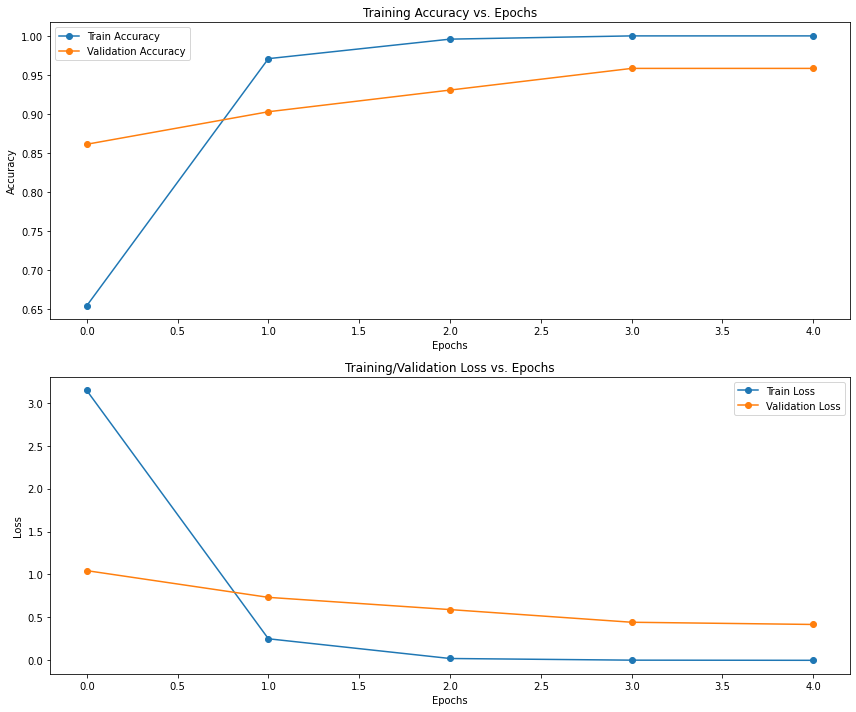

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



plt.tight_layout()
plt.show()

**3.2. Testing the Model on Test Set**

In [16]:
test_dataset = '/content/drive/MyDrive/Artificial Neurons.AI/Dataset/Test'

In [17]:
test_gen = tf.keras.preprocessing.image_dataset_from_directory(
  test_dataset,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 101 files belonging to 4 classes.


In [18]:
test_loss, test_accuracy = model_vgg.evaluate(test_gen, batch_size=batch_size)

4/4 [==============================] - 47s 7s/step - loss: 2.5185 - accuracy: 0.9010


In [19]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

Test Loss:     2.5184519290924072
Test Accuracy: 90.09901285171509


In [20]:
class_names = train_gen.class_names
print(class_names)

['ECG', 'Prescription', 'Report', 'X-Ray']


**3.3 Test VGG Model Predictions On Gradio GUI** 

In [21]:
def predict_image(img):
  img_5d=img.reshape(-1,180,180,3)
  prediction=model_vgg(img_5d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [22]:
import gradio as gr

image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=4)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://25828.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f0250509c90>,
 'http://127.0.0.1:7860/',
 'https://25828.gradio.app')

In [25]:
tf.keras.models.save_model(model_vgg,'vgg_best_model.hdf5')